# Lab 3 : Working with Neural Networks

---


Total Points: **100 points**


Submission Deadline :  **12th-Apr-2024 (10:00 AM)**


---



General Instructions:
---

1. **Code Readability** is very important.
* Modularize your code by making use
of classes and functions that can be flexibly reused wherever necessary.
* Use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as required.
2. Students are expected to follow the **honor code** of the class.

Note: **For any enquiry please write to surbhi.19csz0011@iitrpr.ac.in or akanksha.22csz0001@iitrpr.ac.in**


In this lab, we will perform **clustering** and **classification** tasks.
We will consider “Ecommerce.csv” for the clustering problem, “Facial_Emotion_Recognition.zip” for CNN based multi-class classification, and “winequality.csv” for MLP formulation. All these datasets are available at following link:
https://drive.google.com/drive/folders/1dnTzyeKZrErhJVuGkUVwEaTCoR-Yf2iW?usp=drive_link



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install zip_files

In [ ]:
from zipfile import ZipFile

# Specify the name of your ZIP file
file_name = "/content/drive/MyDrive/Colab Notebooks/ML Assignments/assignment 3/Copy of Facial_Emotion_Recognition.zip"

# Open the ZIP file in read mode
with ZipFile(file_name, 'r') as zipp:
    # Print the table of contents (file names) in the ZIP archive
    # zip.printdir()

    # Extract all files to the current working directory
    zipp.extractall()

print("Extraction complete!")


Extraction complete!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import queue
import os
data_set_path_task1 = '/content/drive/MyDrive/Colab Notebooks/ML Assignments/assignment 3/winequality.csv'
data_set_path_task2 = '/content/Image_dataset'
data_set_path_task3 = '/content/drive/MyDrive/Colab Notebooks/ML Assignments/assignment 3/Ecommerce.csv'
np.random.seed(42)

# Task 1


---



Section 1: MLP  **(Total points = 45)**

---


*   **Task Overview:**
Given a dataset containing 1600 entries offering information about physical and chemical properties of red wine variants.The target variable is the wine quality rating. Use this dataset to predict wine quality based on measurable factors, potentially aiding in the wine making process.

*   **Dataset Split:**
X_train, X_test, Y_train, Y_test = train_test_split(Data, Labels, test_size=0.20, random_state=42)

Develop a Multi-Layer Perceptron (MLP) Neural Network to predict the Wine Quality (Dataset is provided as a CSV file).

**Use of built-in library functions for the specific implementation as asked in the questions are not allowed in this section.**

1. Perform an exploratory analysis on the given dataset. Print the avg, max & min values of each column. Perform data pre-processing operations like standardization and splitting (80:20) of data. **(4 points)**

2. Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh activations at each layer of MLP for the user. **(13 points)**

3. Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both Sigmoid and Tanh activation functions. **(13 points)**

4. Train your model using the “cross-entropy” loss. Mention your choices of the hyperparameters for training. Perform training with batch gradient descent and stochastic gradient descent. Plot the graph of training error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the training methods. **(2+3 = 5)**

5. Using the best training method from the above training, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001]. **(5 points)**
6. Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus learning rate. Comment on your observations. **(3+2 = 5 points)**


## 1. Exploratory Analysis and Preprocessing

In [ ]:
dataset_1 = pd.read_csv(data_set_path_task1, sep = ';')

### Preprocessing

In [ ]:
def shuffle_data(data, labels):
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    return data[idx], labels[idx]


In [ ]:
# Write your code here
def train_test_split(Data, label, test_size=0.2):
    n = Data.shape[0]
    test_num = int(n * test_size)
    train_num = n - test_num
    Data, label = shuffle_data(Data, label)
    X_train = Data[:train_num]
    X_test = Data[train_num:]
    y_train = label[:train_num]
    y_test = label[train_num:]
    return X_train, X_test, y_train, y_test

In [ ]:
def standardize(Data):
    return (Data - Data.mean()) / Data.std()
# standardize(dataset_1)

### Exploratory Analysis

In [ ]:
dataset_1.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
# The min max and mean of the dataset is as follows
dataset_1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 2, 3. MLP With backpropogation

In [ ]:
class dense:

    def __init__(self,no_of_inputs, no_of_output):
        # intial weights and bias as random values
        self.weights = np.random.rand(no_of_output, no_of_inputs) -0.5
        self.bias = np.random.rand(no_of_output, 1) - 0.5
        self.derivative_error_to_weights = np.zeros((no_of_output, no_of_inputs))
        self.derivative_error_to_bias = np.zeros((no_of_output, 1))
        self.back_step = 0


    def forward(self, inputs):
        # input is a column vector
        # gives the output of the layer
        self.inputs = inputs
        self.output = self.weights @ inputs + self.bias
        return self.output

    def backward(self, derivative_error_to_output):
        # calculates the derivative of the error with respect to the weights and bias and learns
        derivative_error_to_weights = derivative_error_to_output @ self.inputs.T
        derivative_error_to_bias = derivative_error_to_output
        self.derivative_error_to_weights += derivative_error_to_weights
        self.derivative_error_to_bias += derivative_error_to_bias
        derivative_error_to_inputs = self.weights.T @ derivative_error_to_output
        self.back_step += 1
        return derivative_error_to_inputs

    def step(self, learning_rate):
        # learns
        self.derivative_error_to_weights /= self.back_step
        self.derivative_error_to_bias /= self.back_step
        self.weights -= learning_rate * self.derivative_error_to_weights
        self.bias -= learning_rate * self.derivative_error_to_bias
        self.derivative_error_to_weights = np.zeros(self.derivative_error_to_weights.shape)
        self.derivative_error_to_bias = np.zeros(self.derivative_error_to_bias.shape)
        self.back_step = 0


class activation:

    def __init__(self, activation, activation_derivative):
        # takes the activation function and its derivative can be tanh, sigmoid, relu, leaky relu, etc
        self.activation = activation
        self.activation_derivative = activation_derivative

    def forward(self, inputs):
        # gives the output of the layer
        self.inputs = inputs
        self.output = self.activation(inputs)
        return self.output

    def backward(self, derivative_error_to_output):
        # calculates the derivative of the error with respect to the inputs and learns
        return self.activation_derivative(self.inputs) * derivative_error_to_output

    def step(self, learning_rate):
        pass

# These are the three types of activation function we have
class Tanh(activation):
    # when we create an object of this class, it will automatically call the __init__ function of the parent class
    # and we can use the functions of the parent class
    def __init__(self):

        def tanh(x):
            return np.tanh(x)

        def tanh_derivative(x):
            return 1 - np.tanh(x)**2

        super().__init__(tanh, tanh_derivative)

class Sigmoid(activation):
    def __init__(self):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        def sigmoid_prime(x):
            s = sigmoid(x)
            return s * (1 - s)

        super().__init__(sigmoid, sigmoid_prime)

class Softmax():
    def forward(self, input):
        tmp = np.exp(input - np.max(input))
        self.output = tmp / np.sum(tmp)
        return self.output

    def backward(self, output_gradient):
        n = np.size(self.output)
        return ((np.identity(n) - self.output.T) * self.output) @ output_gradient

    def step(self, learning_rate):
        pass


class Error():
    def __init__(self):
        self.batch_error = 0
        self.batch_size = 0

    def cross_entropy(self, y_true, y_pred):
        return -np.nansum(y_true * np.log(y_pred))

    def cross_entropy_derivative(self, y_true, y_pred):
        return -np.nan_to_num(y_true / y_pred)

    def get_error(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        e = self.cross_entropy(y_true, y_pred)
        self.batch_error += e
        self.batch_size += 1
        return e

    def get_batch_error(self):
        be = self.batch_error / self.batch_size
        self.batch_error = 0
        self.batch_size = 0
        return be

    def grad(self):
        return self.cross_entropy_derivative(self.y_true, self.y_pred)

class NeuralNetwork:

    def __init__(self):
        """Enter the learning rate and the number of epochs"""
        self.NN =[]

    def add_dense(self, no_of_input, no_of_output):
        """Use this function to add layers to the neural network"""
        self.NN.append(dense(no_of_input, no_of_output))

    def add_activation(self, activation_type):
        """Use this function to add activation functions to the neural network"""
        if activation_type == 'tanh':
            self.NN.append(Tanh())
        elif activation_type == 'sigmoid':
            self.NN.append(Sigmoid())
        elif activation_type == 'softmax':
            self.NN.append(Softmax())
        else:
            print('Activation type not supported')

    def forward_pass(self, x):
        """Use this function to do a forward pass through the neural network"""
        for layer in self.NN:
            x = layer.forward(x)
        return x

    def backward_pass(self, derivative_error_to_output):
        """Use this function to do a backward pass through the neural network"""
        for layer in reversed(self.NN):
            derivative_error_to_output = layer.backward(derivative_error_to_output)

    def weight_update(self, learning_rate):
        """Use this function to update the weights and biases of the neural network"""
        for layer in self.NN:
            layer.step(learning_rate)

    def train(self, X_train, Y_train, learning_rate, epoch, batch_size = 1):
        """Enter the training data and the labels """

        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        Y_train = np.reshape(Y_train, (Y_train.shape[0], Y_train.shape[1], 1))

        num_examples = X_train.shape[0]
        error_history = []
        # number of epochs
        for i in range(epoch):
            X_train, Y_train = shuffle_data(X_train, Y_train) # shuffling the data in each epoch

            batch_error_history = []
            # number of batches
            for j in range(0, num_examples, batch_size):
                X_batch = X_train[j:j+batch_size]
                Y_batch = Y_train[j:j+batch_size]
                error = Error()
                # data in each batch
                for x, y in zip(X_batch, Y_batch):
                    y_pred = self.forward_pass(x) # forward pass
                    error.get_error(y, y_pred) # get error
                    self.backward_pass(error.grad()) # backward pass cumilating the gradients
                batch_error_history.append(error.get_batch_error())
                self.weight_update(learning_rate) # update the weights and biases

            error_history.append(np.mean(batch_error_history))
            sys.stdout.write(f'\rEpoch: {i}, Loss: {error_history[-1]}')

        return error_history

    def predict(self, X_test):
        """Enter the test data"""
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        # each data point is a column in the matrix X_test
        # returns the predicted value for each data point

        Y_pred = []
        for x in X_test:
            Y_pred.append(self.forward_pass(x))
        Y_pred = np.array(Y_pred).reshape(len(Y_pred), -1)
        return Y_pred

## 4. Training Batch Training Vs Stochastic

Activation Function: Sigmoid
Batch Gradient Descent
Epoch: 999, Loss: 1.033621678427296
Train Accuracy: 0.55625, Test Accuracy: 0.6238244514106583


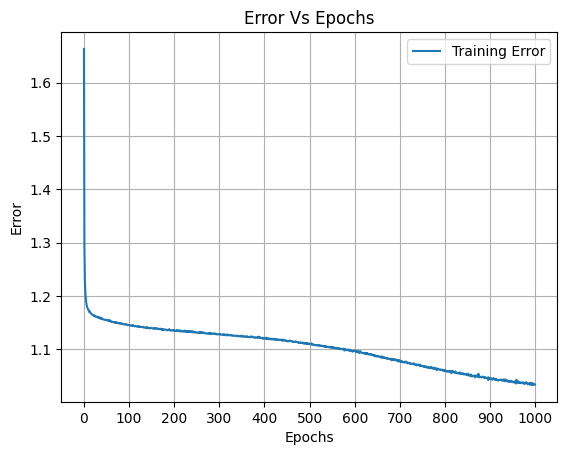

Stochastic Gradient Descent
Epoch: 999, Loss: 0.9348280472633927
Train Accuracy: 0.603125, Test Accuracy: 0.6018808777429467


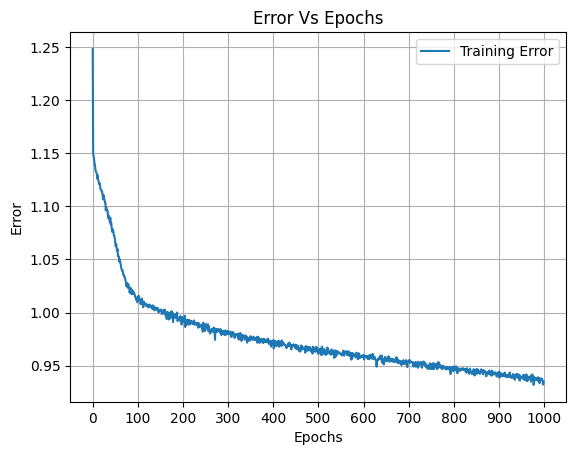


Activation Function: Tanh
Batch Gradient Descent
Epoch: 999, Loss: 0.9642038484120414
Train Accuracy: 0.58203125, Test Accuracy: 0.5454545454545454


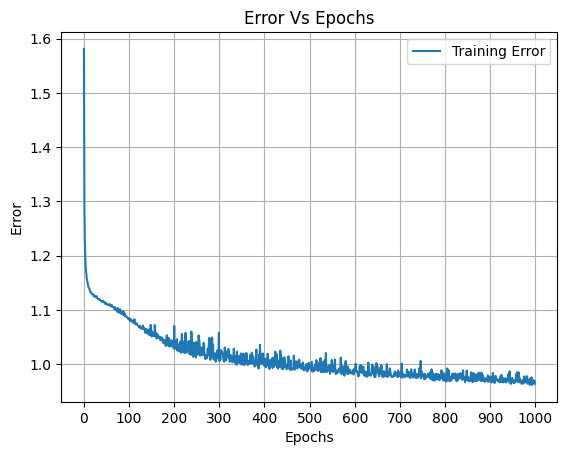

Stochastic Gradient Descent
Epoch: 999, Loss: 0.925666505533956
Train Accuracy: 0.625, Test Accuracy: 0.5736677115987461


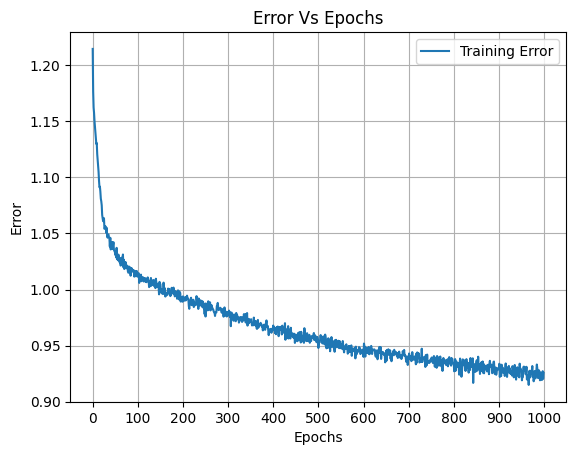

In [ ]:
def experiment1_task1(epochs = 1000,learning_rate = 0.01, batch_size = 32, activation = 'sigmoid'):
    X = dataset_1.iloc[:, :-1].values
    y = dataset_1.iloc[:, -1].values
    y = pd.get_dummies(y).values
    X = standardize(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    NN = NeuralNetwork()
    NN.add_dense(11, 15)
    NN.add_activation(activation)
    NN.add_dense(15, 6)
    NN.add_activation('softmax')
    # print(len(X_train))
    errors= NN.train(X_train, y_train, learning_rate, epochs, batch_size)
    # print(NN.NN[0].weights)
    # print(errors)
    y_pred = NN.predict(X_test)
    y_pred = np.argmax(y_pred, axis = 1)
    y_test = np.argmax(y_test, axis = 1)
    accuracy_test = np.mean(y_pred == y_test)

    y_pred_train = NN.predict(X_train)
    y_pred_train = np.argmax(y_pred_train, axis = 1)
    y_train = np.argmax(y_train, axis = 1)
    accuracy_train = np.mean(y_pred_train == y_train)

    print()
    print(f'Train Accuracy: {accuracy_train}, Test Accuracy: {accuracy_test}')

    plt.plot(range(epochs), errors, label = 'Training Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Error Vs Epochs')
    plt.xticks(range(0, epochs + 10, epochs//10))
    plt.grid()
    plt.legend()
    plt.show()

    return accuracy_train, accuracy_test

# we have taken the learning rate diff for batch and stochastic gradient descent to avoid oscillations in loss function minimization
# reported the accuracy for each experiment and the plot of the error vs epochs
print("Activation Function: Sigmoid")
print("Batch Gradient Descent")
experiment1_task1(epochs = 1000, learning_rate = 0.1, batch_size = 128)
print("Stochastic Gradient Descent")
experiment1_task1(epochs = 1000, learning_rate = 0.01, batch_size = 1)
print()

print("Activation Function: Tanh")
print("Batch Gradient Descent")
experiment1_task1(epochs = 1000, learning_rate = 0.1, batch_size = 128, activation = 'tanh')
print("Stochastic Gradient Descent")
experiment1_task1(epochs = 1000, learning_rate = 0.01, batch_size = 1, activation = 'tanh')
print()


## 5, 6. Diffrent Learning Rates

Learning Rate: 0.001
Epoch: 1499, Loss: 1.125936545239399
Train Accuracy: 0.51015625, Test Accuracy: 0.5235109717868338


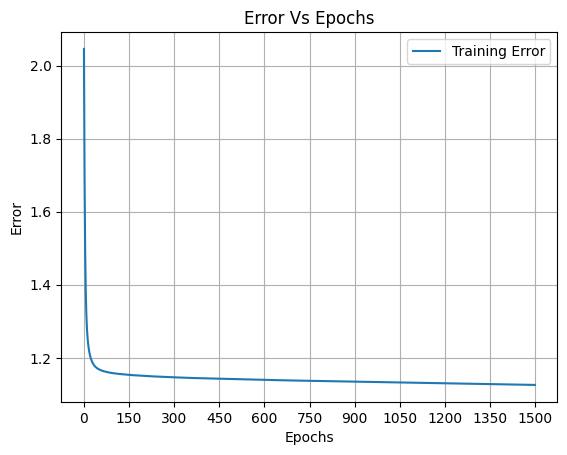

Learning Rate: 0.01
Epoch: 1499, Loss: 0.995928206943341
Train Accuracy: 0.5859375, Test Accuracy: 0.6300940438871473


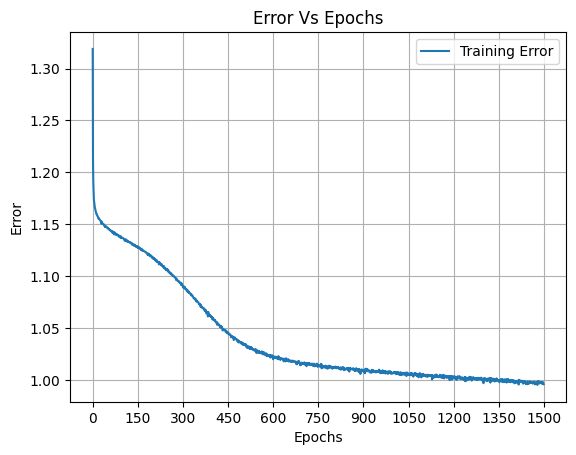

Learning Rate: 0.1
Epoch: 1499, Loss: 0.8994739972620518
Train Accuracy: 0.6296875, Test Accuracy: 0.54858934169279


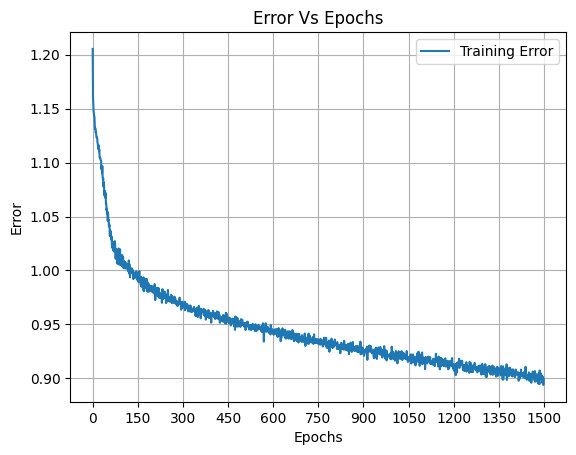

Learning Rate: 0.5
Epoch: 1499, Loss: 0.9057000973183517
Train Accuracy: 0.60625, Test Accuracy: 0.5611285266457681


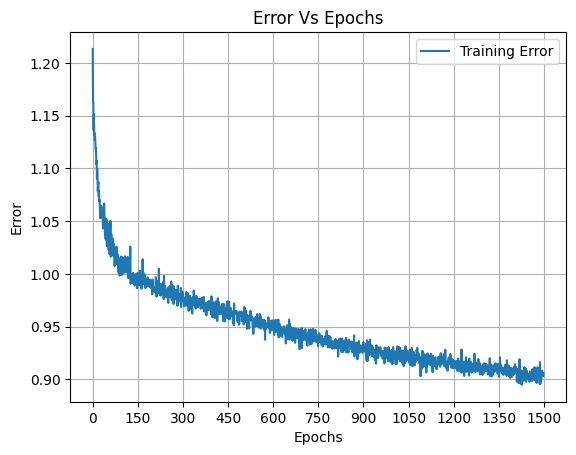

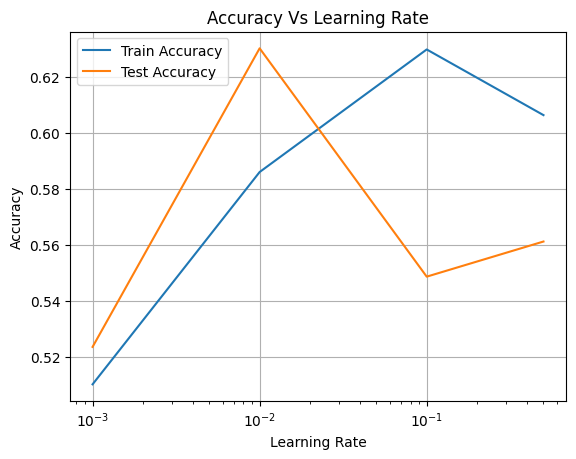

In [ ]:
#Write your code here
def experiment2_task1(epochs = 1000):
    lrs = [0.001, 0.01, 0.1, 0.5]
    train_accuracies = []
    test_accuracies = []
    for lr in lrs:
        print(f'Learning Rate: {lr}')
        train_accuracy, test_accuracy = experiment1_task1(epochs = epochs, learning_rate = lr, batch_size = 8)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    plt.plot(lrs, train_accuracies, label = 'Train Accuracy')
    plt.plot(lrs, test_accuracies, label = 'Test Accuracy')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Vs Learning Rate')
    plt.grid()
    plt.xticks(lrs)
    plt.legend()
    plt.xscale('log')
    plt.show()
experiment2_task1(epochs = 1500)

###We find that the learning rate of 0.01 gives fast convergence without oscilating too much the higher learning rates oscilate too much while the lower learning rate failed to converge. Here I have taken batch size to be 8 and no of epochs to be 1500. further the best test acc is also achived at the learning rate of 0.01. the monotonus increase in the training acc represents overfitting at higher learning rates.

# Task 2


---



Section 2:    Multi-class classification
 **(Total points = 40)**

---
**Description of Dataset:**

*   The dataset consists of grayscale images portraying faces with dimensions of 48x48 pixels. The images have undergone automatic alignment to ensure that each face is approximately centered, maintaining a consistent amount of space in every image.
*  The primary objective is to categorize each face based on the expressed emotion, assigning it to one of three categories: Happy (0), Sad (1), or Neutral (2). The training set encompasses 17,109 examples, while the public test set comprises 4,254 examples.


**Tasks:**

1. **Explore the Dataset:** Display three randomly selected images from each class to visually understand the dataset. Generate a distribution plot illustrating the number of images in each emotion class? Is the distribution uniform? Comment. **(5 points)**
2. **Convolution:** Implement the 2D convolution function using a kernel size of 3x3. Use the sobel kernel and display the feature map for one example from each emotion class. For using sobel kernel, you need to calculate two convolutions, one for x-direction (x) and one for y-direction (y), the feature map then can be calculated as


 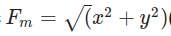

**(10 points)**

3. **Implement Sequential CNN Model** : Utilize the Keras library to implement a sequential Convolutional Neural Network (CNN) model for facial emotion classification. Adopt the following network architecture for the CNN model:


* Input layer
* Con2D with 128 neurons 3x3 kernels and ReLU activation.
* Con2D with 64 neurons 3x3 kernels and ReLU activation with batch normalization.
* Max Pooling layer with pool-size 2x2 and padding as 'valid'.
* Con2D with 16 neurons 3x3 kernels and ReLU activation and stride 2.
* Con2D with 10 neurons 3x3 kernels and ReLU activation.
* Max Pooling layer with pool-size 2x2 and padding as 'valid'.
* Batch normalization
* Fully Connected Dense Layer with 128 neurons , relu activation and L2 kernel regularizer with factor of 0.05.
* Dropout of 30% ie. 0.3
* Fully Connected Dense Layer with number of classes neurons and softmax activation.

**(5 points)**

4. **Training and Compiling:** Utilize cross-entropy loss for multi-class classification and proceed to compile and train the model employing four distinct optimizers: SGD, RMSprop, Adam, and Adagrad. Generate plots illustrating the training loss for each optimizer. Provide commentary on your observations. Additionally, incorporate early stopping with parameters (min_delta=0.01, patience=2) during both the compilation and training phases of your model. **(10 points)**


**NOTE: You can try to find the best learning rate from the following: [0.001, 0.0001, 0.00001, 0.01] and take batch size to be 32 in data generators.**

5. **Activation Maps:** Generate activation maps for two selected intermediate convolutional blocks across randomly chosen 10 images, state class-specific observations. **(10 points)**


## 1. Exploration

In [ ]:
def get_data():
    path = data_set_path_task2
    train_path = os.path.join(path, 'train')
    test_path = os.path.join(path, 'test')
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    for emotion in os.listdir(train_path):
        for image in os.listdir(os.path.join(train_path, emotion)):
            img = plt.imread(os.path.join(train_path, emotion, image))
            X_train.append(img)
            y_train.append(emotion)
        for image in os.listdir(os.path.join(test_path, emotion)):
            img = plt.imread(os.path.join(test_path, emotion, image))
            X_test.append(img)
            y_test.append(emotion)
    return np.array(X_train).astype(float), np.array(y_train), np.array(X_test).astype(float), np.array(y_test)

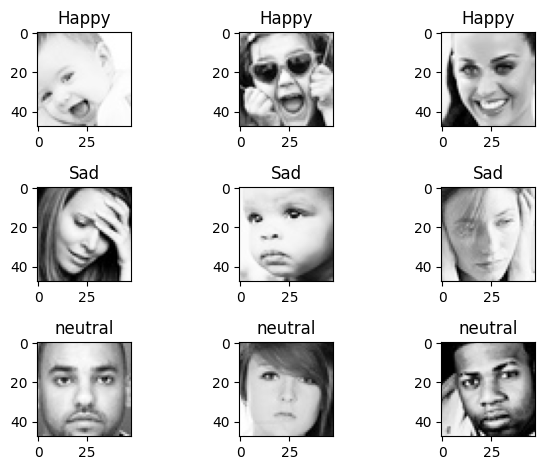

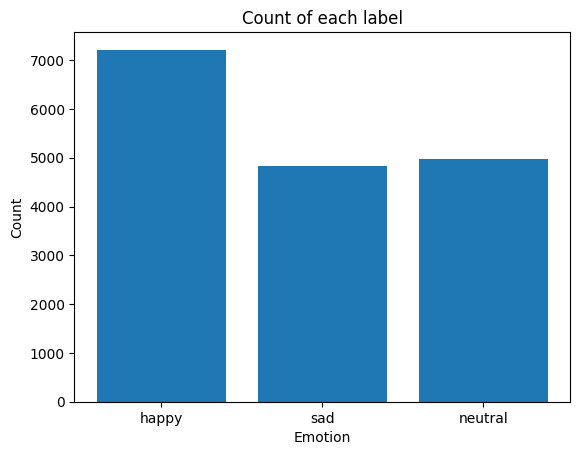

In [ ]:
def experiment1_task2():
    X_train, y_train, X_test, y_test = get_data()
    # 3 image of each lable
    y1 = y_train == 'happy'
    y2 = y_train == 'sad'
    y3 = y_train == 'neutral'
    # print(X_train[y1][0].shape)
    plt.subplot(331)
    plt.imshow(X_train[y1][0], cmap='Greys_r')
    plt.title('Happy')
    plt.subplot(332)
    plt.imshow(X_train[y1][1], cmap='Greys_r')
    plt.title('Happy')
    plt.subplot(333)
    plt.imshow(X_train[y1][2], cmap='Greys_r')
    plt.title('Happy')

    plt.subplot(334)
    plt.imshow(X_train[y2][0], cmap='Greys_r')
    plt.title('Sad')
    plt.subplot(335)
    plt.imshow(X_train[y2][1], cmap='Greys_r')
    plt.title('Sad')
    plt.subplot(336)
    plt.imshow(X_train[y2][2], cmap='Greys_r')
    plt.title('Sad')

    plt.subplot(337)
    plt.imshow(X_train[y3][0], cmap='Greys_r')
    plt.title('neutral')
    plt.subplot(338)
    plt.imshow(X_train[y3][1], cmap='Greys_r')
    plt.title('neutral')
    plt.subplot(339)
    plt.imshow(X_train[y3][2], cmap='Greys_r')
    plt.title('neutral')

    plt.tight_layout()
    plt.show()

    # count plot of the labels
    plt.bar(['happy', 'sad', 'neutral'], [np.sum(y1), np.sum(y2), np.sum(y3)])
    plt.title('Count of each label')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.show()
experiment1_task2()


# The data is not completely balanced, but there is not a huge difference in the number of data points in each class

## 2. Sobel Kernel

In [ ]:
def conv2D(M, a):
    """Conv2d M is the input matrix and a is the filter"""
    n = M.shape[0]
    m = M.shape[1]
    k = a.shape[0]
    l = a.shape[1]
    n_out = n - k + 1
    m_out = m - l + 1
    out = np.zeros((n_out, m_out))
    for i in range(n_out):
        for j in range(m_out):
            out[i, j] = np.sum(M[i:i+k, j:j+l] * a)
    return out

In [ ]:
#Write your code here
def sobel(img):
    kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    ky = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    Gx = conv2D(img, kx)
    Gy = conv2D(img, ky)
    G = np.sqrt(Gx**2 + Gy**2)
    return G

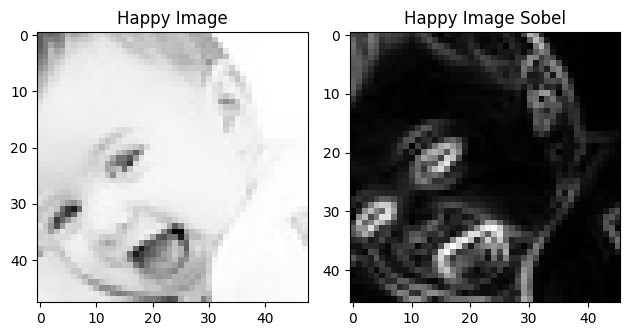

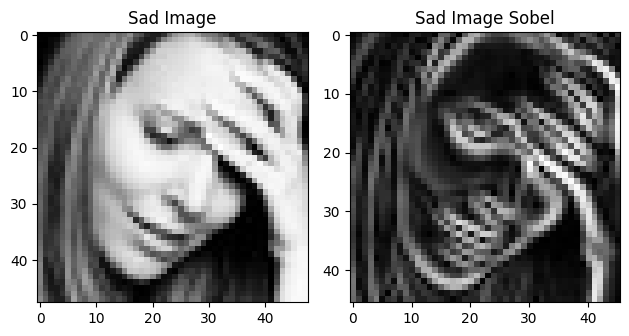

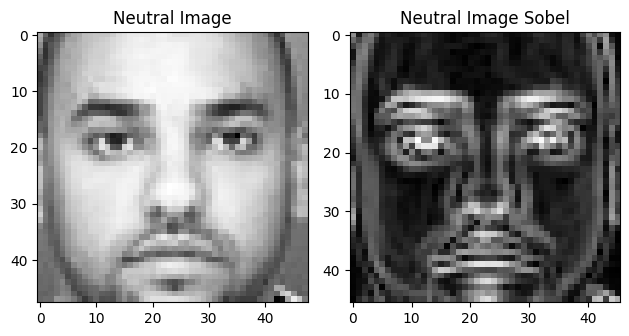

In [ ]:
def Q2_task2():
    path = data_set_path_task2
    happy_img_path = os.path.join(path, 'train', 'happy')
    sad_img_path = os.path.join(path, 'train', 'sad')
    neutral_img_path = os.path.join(path, 'train', 'neutral')

    happy_img = plt.imread(os.path.join(happy_img_path, os.listdir(happy_img_path)[0]))
    sad_img = plt.imread(os.path.join(sad_img_path, os.listdir(sad_img_path)[0]))
    neutral_img = plt.imread(os.path.join(neutral_img_path, os.listdir(neutral_img_path)[0]))

    happy_img_sobel = sobel(happy_img)
    sad_img_sobel = sobel(sad_img)
    neutral_img_sobel = sobel(neutral_img)

    plt.subplot(121)
    plt.imshow(happy_img, cmap='Greys_r')
    plt.title('Happy Image')
    plt.subplot(122)
    plt.imshow(happy_img_sobel, cmap='Greys_r')
    plt.title('Happy Image Sobel')
    plt.tight_layout()
    plt.show()

    plt.subplot(121)
    plt.imshow(sad_img, cmap='Greys_r')
    plt.title('Sad Image')
    plt.subplot(122)
    plt.imshow(sad_img_sobel, cmap='Greys_r')
    plt.title('Sad Image Sobel')
    plt.tight_layout()
    plt.show()

    plt.subplot(121)
    plt.imshow(neutral_img, cmap='Greys_r')
    plt.title('Neutral Image')
    plt.subplot(122)
    plt.imshow(neutral_img_sobel, cmap='Greys_r')
    plt.title('Neutral Image Sobel')
    plt.tight_layout()
    plt.show()
Q2_task2()

## 3. CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def Q3_task2():
    # Create a Sequential model
    modelCnn = Sequential()

    # Add layers to the model
    modelCnn.add(Conv2D(128, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    modelCnn.add(Conv2D(64, (3, 3), activation='relu'))
    modelCnn.add(BatchNormalization())
    modelCnn.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    modelCnn.add(Conv2D(16, (3, 3), activation='relu', strides=2))
    modelCnn.add(Conv2D(10, (3, 3), activation='relu'))
    modelCnn.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    modelCnn.add(BatchNormalization())
    modelCnn.add(Flatten())
    modelCnn.add(Dense(128, activation='relu', kernel_regularizer=l2(0.05)))
    modelCnn.add(Dropout(0.3))
    modelCnn.add(Dense(3, activation='softmax'))

    return modelCnn


## 4. Training and Compilation

---------------------SGD-------------------
Epoch 1/20
532/532 [==============================] - 9s 13ms/step - loss: 5.4331 - accuracy: 0.4527 - val_loss: 3.4305 - val_accuracy: 0.5005
Epoch 2/20
532/532 [==============================] - 7s 13ms/step - loss: 2.4713 - accuracy: 0.5290 - val_loss: 1.8231 - val_accuracy: 0.5308
Epoch 3/20
532/532 [==============================] - 7s 12ms/step - loss: 1.4407 - accuracy: 0.5671 - val_loss: 1.2401 - val_accuracy: 0.5559
Epoch 4/20
532/532 [==============================] - 7s 13ms/step - loss: 1.0571 - accuracy: 0.5990 - val_loss: 1.2637 - val_accuracy: 0.4671
Epoch 5/20
532/532 [==============================] - 7s 12ms/step - loss: 0.9121 - accuracy: 0.6124 - val_loss: 0.9124 - val_accuracy: 0.5936
Epoch 6/20
532/532 [==============================] - 7s 13ms/step - loss: 0.8480 - accuracy: 0.6330 - val_loss: 0.8846 - val_accuracy: 0.6072
Epoch 7/20
532/532 [==============================] - 7s 12ms/step - loss: 0.8059 - accuracy: 0.64

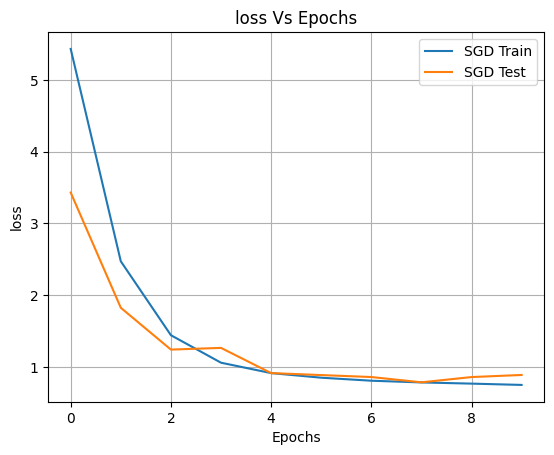

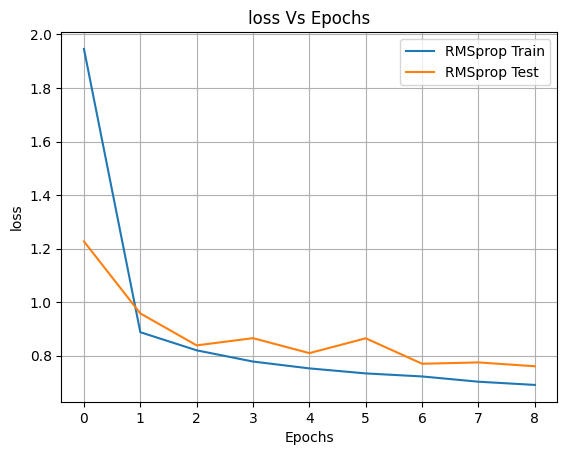

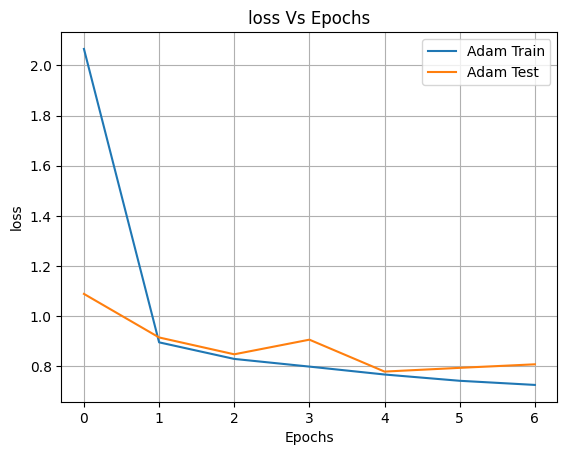

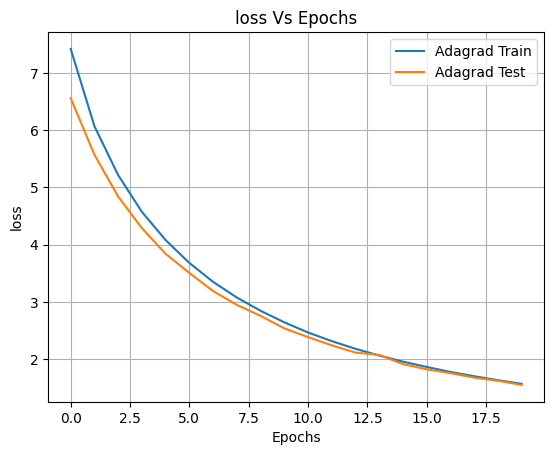

In [ ]:
def Q4_task2():
    X_train, y_train, X_test, y_test = get_data()
    s1 = X_train.shape
    s2 = X_test.shape
    X_train = X_train.reshape((s1[0], s1[1], s1[2], 1))
    X_test = X_test.reshape((s2[0], s2[1], s2[2], 1))
    y_train = np.array(pd.get_dummies(y_train))
    y_test = np.array(pd.get_dummies(y_test))

    print('---------------------SGD-------------------')
    model_sgd = Q3_task2()
    model_sgd.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
    history_sgd = model_sgd.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.01, patience=2)])

    print('---------------------RMSprop-------------------')
    model_RMSprop = Q3_task2()
    model_RMSprop.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
    history_RMSprop = model_RMSprop.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.01, patience=2)])

    print('---------------------Adam-------------------')
    model_Adam = Q3_task2()
    model_Adam.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    history_Adam = model_Adam.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.01, patience=2)])

    print('---------------------Adagrad-------------------')
    model_Adagrad = Q3_task2()
    model_Adagrad.compile(optimizer=Adagrad(), loss='categorical_crossentropy', metrics=['accuracy'])
    history_Adagrad = model_Adagrad.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.01, patience=2)])

    plt.plot(history_sgd.history['loss'], label = 'SGD Train')
    plt.plot(history_sgd.history['val_loss'], label = 'SGD Test')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.title('loss Vs Epochs')
    plt.grid()
    plt.legend()
    plt.show()

    plt.plot(history_RMSprop.history['loss'], label = 'RMSprop Train')
    plt.plot(history_RMSprop.history['val_loss'], label = 'RMSprop Test')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.title('loss Vs Epochs')
    plt.grid()
    plt.legend()
    plt.show()

    plt.plot(history_Adam.history['loss'], label = 'Adam Train')
    plt.plot(history_Adam.history['val_loss'], label = 'Adam Test')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.title('loss Vs Epochs')
    plt.grid()
    plt.legend()
    plt.show()

    plt.plot(history_Adagrad.history['loss'], label = 'Adagrad Train')
    plt.plot(history_Adagrad.history['val_loss'], label = 'Adagrad Test')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.title('loss Vs Epochs')
    plt.grid()
    plt.legend()
    plt.show()

    return history_sgd, history_RMSprop, history_Adam, history_Adagrad

history_sgd, history_RMSprop, history_Adam, history_Adagrad = Q4_task2()

### We find that adam and RMSprop is the best optimizer in this case and adagrad is taking the longest to converge

## 5. Conv Maps

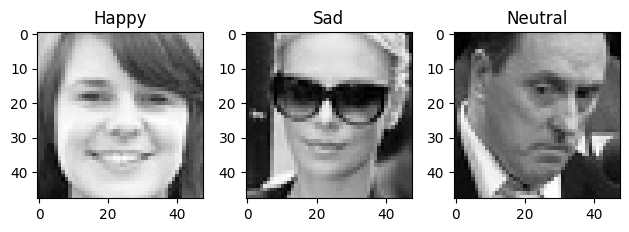

Epoch 1/20
532/532 [==============================] - 10s 14ms/step - loss: 2.1082 - accuracy: 0.5040 - val_loss: 1.0030 - val_accuracy: 0.5320
Epoch 2/20
532/532 [==============================] - 6s 12ms/step - loss: 0.9098 - accuracy: 0.5971 - val_loss: 0.9229 - val_accuracy: 0.5898
Epoch 3/20
532/532 [==============================] - 7s 13ms/step - loss: 0.8494 - accuracy: 0.6256 - val_loss: 0.9438 - val_accuracy: 0.5484
Epoch 4/20
532/532 [==============================] - 6s 12ms/step - loss: 0.8127 - accuracy: 0.6536 - val_loss: 0.8572 - val_accuracy: 0.6347
Epoch 5/20
532/532 [==============================] - 7s 13ms/step - loss: 0.7793 - accuracy: 0.6743 - val_loss: 0.8275 - val_accuracy: 0.6406
Epoch 6/20
532/532 [==============================] - 7s 12ms/step - loss: 0.7509 - accuracy: 0.6909 - val_loss: 0.7632 - val_accuracy: 0.6768
Epoch 7/20
532/532 [==============================] - 7s 13ms/step - loss: 0.7313 - accuracy: 0.6967 - val_loss: 0.8335 - val_accuracy: 0.625

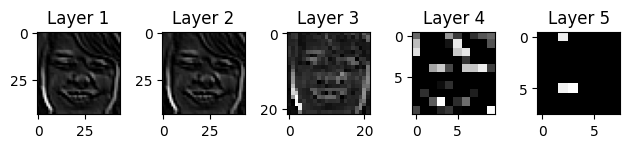

class Sad


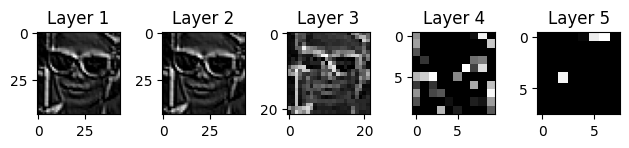

class Neutral


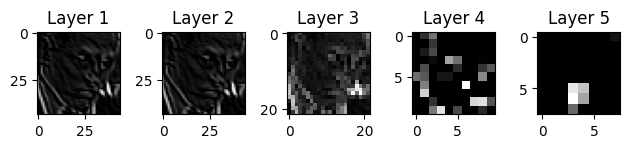

In [ ]:
def Q5_task2():
    X_train, y_train, X_test, y_test = get_data()
    s1 = X_train.shape
    s2 = X_test.shape
    X_train = X_train.reshape((s1[0], s1[1], s1[2], 1))
    X_test = X_test.reshape((s2[0], s2[1], s2[2], 1))
    y_train = np.array(pd.get_dummies(y_train))
    y_test = np.array(pd.get_dummies(y_test))

    # showing 1 image of each class in the testing data
    plt.subplot(131)
    plt.imshow(X_test[y_test[:, 0] == 1][0], cmap='Greys_r')
    plt.title('Happy')
    plt.subplot(132)
    plt.imshow(X_test[y_test[:, 1] == 1][0], cmap='Greys_r')
    plt.title('Sad')
    plt.subplot(133)
    plt.imshow(X_test[y_test[:, 2] == 1][0], cmap='Greys_r')
    plt.title('Neutral')
    plt.tight_layout()
    plt.show()

    model_Adam = Q3_task2()
    model_Adam.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    model_Adam.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.01, patience=2)])

    layer_outputs = [layer.output for layer in model_Adam.layers]
    activation_model = tf.keras.models.Model(inputs=model_Adam.input, outputs=layer_outputs)

    img1 = X_test[y_test[:, 0] == 1][0]
    img2 = X_test[y_test[:, 1] == 1][0]
    img3 = X_test[y_test[:, 2] == 1][0]
    img1 = img1.reshape(1, 48, 48, 1)
    img2 = img2.reshape(1, 48, 48, 1)
    img3 = img3.reshape(1, 48, 48, 1)
    activations1 = activation_model.predict(img1)
    activations2 = activation_model.predict(img2)
    activations3 = activation_model.predict(img3)

    print("class Happy")
    for i in range(1, 6):
        plt.subplot(1, 5, i)
        plt.imshow(activations1[i][0, :, :, 0], cmap='Greys_r')
        plt.title(f'Layer {i}')
    plt.tight_layout()
    plt.show()

    print("class Sad")
    for i in range(1, 6):
        plt.subplot(1, 5, i)
        plt.imshow(activations2[i][0, :, :, 0], cmap='Greys_r')
        plt.title(f'Layer {i}')
    plt.tight_layout()
    plt.show()

    print("class Neutral")
    for i in range(1, 6):
        plt.subplot(1, 5, i)
        plt.imshow(activations3[i][0, :, :, 0], cmap='Greys_r')
        plt.title(f'Layer {i}')
    plt.tight_layout()
    plt.show()
Q5_task2()





# Task 3


---



Section 3:    Clustering  **(Total points = 15)**

---
**Description of Dataset:**

*   The dataset includes details about everything people bought from a UK-based online store over the span of eight months including productID, product descriptions and Country.
*  Objective is to explore clustering approaches.


Before implementing the clustering codes, you should perform data analysis part by performing following operations:

1.   Visualize the top countries by total sales.
2.   Visualize the product categories.
2.   Check the column data types and missing values and handle it
1.   Check the unique values in each column


**Note: you are not allowed to use sklearn’s direct functions (or any in-built functions) for clustering. Write the code at your own.**


Consider the following two features [Product_Count, 'Product_UnitPrice'] for the following tasks–
1. **K-Means Clustering:** Implement the K-Means clustering algorithm on the online retail data. Determine the optimal number of clusters using appropriate methods. Interpret and discuss the results obtained from K-Means clustering. **(5 points)**

2. **K-Medoids Clustering:** Apply the K-Medoids clustering algorithm to the same online retail data. Explain the differences between K-Means and K-Medoids algorithm results. Evaluate the effectiveness of K-Medoids in clustering the online retail data. **(5 points)**

3. **DBSCAN Clustering:** Implement the DBSCAN clustering algorithm on the online retail dataset. Discuss the parameters used for DBSCAN and their impact on the results. Compare and contrast DBSCAN with K-Means and K-Medoids in the context of online retail data. **(5 points)**

### The data set is too big so i am using 1/50th of the data set as the time complexity of k - mediods and DB scan can be O(n^2) in worst case allthough i have made some optimizations still db scan can take a long time on the complete data set

## 0. Data Visuablization

In [ ]:
# Write your code here
def get_data_task3():
    data = pd.read_csv(data_set_path_task3)
    return data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductID          541909 non-null  object 
 1   StockCode          541909 non-null  object 
 2   Product_Details    540455 non-null  object 
 3   Product_Count      541909 non-null  int64  
 4   Product_UnitPrice  541909 non-null  float64
 5   Cus_ID             406829 non-null  float64
 6   Country            541909 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB

       Product_Count  Product_UnitPrice         Cus_ID
count  541909.000000      541909.000000  406829.000000
mean        9.552250           4.611114   15287.690570
std       218.081158          96.759853    1713.600303
min    -80995.000000      -11062.060000   12346.000000
25%         1.000000           1.250000   13953.000000
50%         3.000000           2.080000   15152.000000


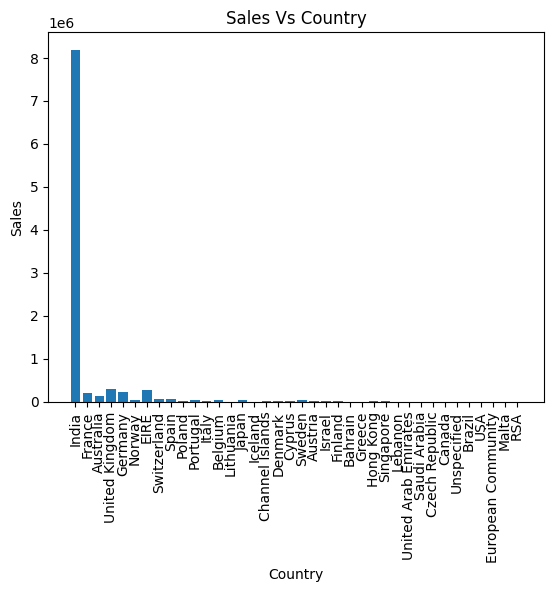

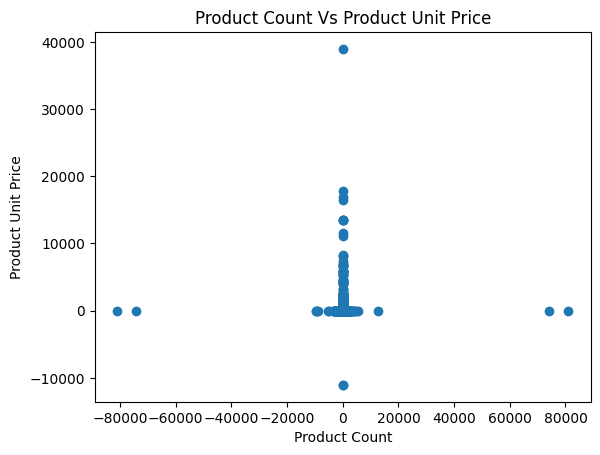

No of categories: 4224 and the categories are:
{'WHITE HANGING HEART T-LIGHT HOLDER': 2369, 'WHITE METAL LANTERN': 328, 'CREAM CUPID HEARTS COAT HANGER': 293, 'KNITTED UNION FLAG HOT WATER BOTTLE': 473, 'RED WOOLLY HOTTIE WHITE HEART.': 449, 'SET 7 BABUSHKA NESTING BOXES': 389, 'GLASS STAR FROSTED T-LIGHT HOLDER': 141, 'HAND WARMER UNION JACK': 515, 'HAND WARMER RED POLKA DOT': 18, 'ASSORTED COLOUR BIRD ORNAMENT': 1501, "POPPY'S PLAYHOUSE BEDROOM ": 436, "POPPY'S PLAYHOUSE KITCHEN": 451, 'FELTCRAFT PRINCESS CHARLOTTE DOLL': 469, 'IVORY KNITTED MUG COSY ': 111, 'BOX OF 6 ASSORTED COLOUR TEASPOONS': 213, 'BOX OF VINTAGE JIGSAW BLOCKS ': 243, 'BOX OF VINTAGE ALPHABET BLOCKS': 272, 'HOME BUILDING BLOCK WORD': 806, 'LOVE BUILDING BLOCK WORD': 656, 'RECIPE BOX WITH METAL HEART': 8, 'DOORMAT NEW ENGLAND': 608, 'JAM MAKING SET WITH JARS': 1229, 'RED COAT RACK PARIS FASHION': 114, 'YELLOW COAT RACK PARIS FASHION': 103, 'BLUE COAT RACK PARIS FASHION': 160, 'BATH BUILDING BLOCK WORD': 285, 'ALARM

In [ ]:
def visualize():
    data = get_data_task3()
    data.info()
    print()
    print(data.describe())
    sales = {}
    categories = {}
    for row in data.values:
        if row[6] not in sales:
            sales[row[6]] = 0
        sales[row[6]] += row[3] * row[4]

        if row[2] not in categories:
            categories[row[2]] = 0
        categories[row[2]] += 1

    plt.bar(sales.keys(), sales.values())
    plt.xlabel('Country')
    plt.ylabel('Sales')
    plt.title('Sales Vs Country')
    plt.xticks(rotation = 90)
    plt.show()

    x, y = data['Product_Count'], data['Product_UnitPrice']
    plt.scatter(x, y)
    plt.title('Product Count Vs Product Unit Price')
    plt.xlabel('Product Count')
    plt.ylabel('Product Unit Price')
    plt.show()



    print(f"No of categories: {len(categories)} and the categories are:")
    print(categories)
    print()

    print("Missing value in each collumn is: ")
    print(data.isnull().sum())
    print()

    print("Unique values in each column are: ")
    print(data.nunique())
    print()

    print("No of rows in the dataset are:")
    print(len(data))
visualize()

## 1. K - Means

In [ ]:
class Kmeans():
    def __init__(self, k = 5) -> None:
        self.centers_ = []
        self.k = k


    def train(self, data, epochs = 1000):
        self.centers_ = data[np.random.choice(data.shape[0], self.k, replace=False)]
        self.centers_ = np.array(self.centers_)
        for epoch in range(epochs):
            sys.stdout.write(f'\rEpoch: {epoch}')
            clusters = self.predict(data)
            self.prev_centers = self.centers_.copy()
            for i in range(self.k):
                self.centers_[i] = np.mean(data[clusters == i], axis = 0)
            if np.all(self.centers_ == self.prev_centers):
                break
        return self.centers_


    def predict(self, data):
        """Assigns the data points to the nearest cluster"""
        d = ((data - self.centers_[:, np.newaxis])**2).sum(axis = 2)
        return np.argmin(d, axis = 0)

## 2. K - medoids

In [ ]:
class Kmediods():
    def __init__(self, k) -> None:
        self.centers_ = []
        self.k = k

    def predict(self, data):
        """Assigns the data points to the nearest cluster"""
        d = ((data - self.centers_[:, np.newaxis])**2).sum(axis = 2)
        return np.argmin(d, axis = 0), np.min(d, axis = 0).sum()

    def train(self, data, max_itr_per_k = 100):
        self.centers_ = data[np.random.choice(data.shape[0], self.k, replace=False)]
        self.centers_ = np.array(self.centers_)
        _, cost = self.predict(data)
        for i in range(self.k):
            not_done = [i for i in range(len(data)) if data[i] not in self.centers_] # all the points which are not the centers

            for j in range(max_itr_per_k):
                sys.stdout.write(f'\rCluster: {i}, Iteration: {j}')

                centers = self.centers_.copy()

                # if all the points are already tried
                if len(not_done) == 0:
                    break

                new_point_index = np.random.choice(not_done, 1)[0]
                not_done.remove(new_point_index)

                self.centers_[i] = data[new_point_index]
                _, cost_new = self.predict(data)

                if cost_new < cost:
                    self.centers_ = centers
                else:
                    cost = cost_new


        return self.centers_

## 3. DBScan

In [ ]:
class DBScan():
    def __init__(self, epi, min_samples) -> None:
        """
        epi: min dist between two points to be considered as neighbors
        min_samples: min no of neighbors to be considered as core point
        """
        self.epi = epi
        self.min_samples = min_samples
        self.cluster_count = 0


    def create_adj(self, data):
        x_max = int(np.max(data[:, 0]))
        x_min = int(np.min(data[:, 0]))
        y_max = int(np.max(data[:, 1]))
        y_min = int(np.min(data[:, 1]))

        grid_to_points = {}

        points_to_grid = {}
        for point in data:
            x, y = point[0], point[1]
            grid_cell = (x//self.epi, y//self.epi)
            if grid_cell not in grid_to_points:
                grid_to_points[grid_cell] = []
            grid_to_points[grid_cell].append(point)
            points_to_grid[(x, y)] = grid_cell

        adj = {}
        p = 0
        for point in data:
            p += 1
            sys.stdout.write(f'\rPoint: {p}')
            x, y = point[0], point[1]
            grid_cell = points_to_grid[(x, y)]
            adj[(x, y)] = []
            for i in range(-1, 2):
                for j in range(-1, 2):
                    if (grid_cell[0] + i, grid_cell[1] + j) in grid_to_points:
                        for neighbor in grid_to_points[(grid_cell[0] + i, grid_cell[1] + j)]:
                            if np.sum((point - neighbor)**2) <= self.epi**2:
                                adj[(x, y)].append(tuple(neighbor))

        return adj


    def fit(self, data):
        adj = self.create_adj(data)
        cluster = {}
        core_points = []
        non_core_points = []
        for point in data:
            point = tuple(point)
            cluster[point] = None
            if len(adj[point]) >= self.min_samples:
                core_points.append(point)
            else:
                non_core_points.append(point)

        for cp in core_points:
            sys.stdout.write(f'\rCluster Count: {self.cluster_count}')
            if cluster[cp] is not None:
                continue
            self.cluster_count += 1
            sys.stdout.write(f'\rCluster Count: {self.cluster_count}')
            cluster[cp] = self.cluster_count
            q = queue.Queue()
            q.put(cp)
            while not q.empty():
                p = q.get()
                for neighbor in adj[p]:
                    if cluster[neighbor] is None:
                        cluster[neighbor] = self.cluster_count
                        q.put(neighbor)

        return cluster


## 4. Comparision

In [ ]:
def wcsse(data, centers, clusters):
    cost = 0
    for i in range(len(data)):
        cost += np.sum((data[i] - centers[clusters[i]])**2)
    return cost

Epoch: 21

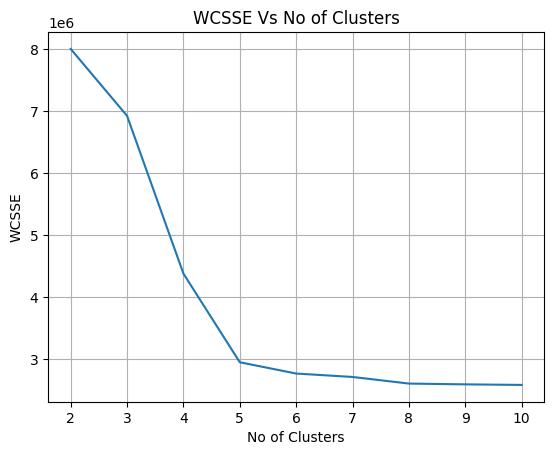

Epoch: 15

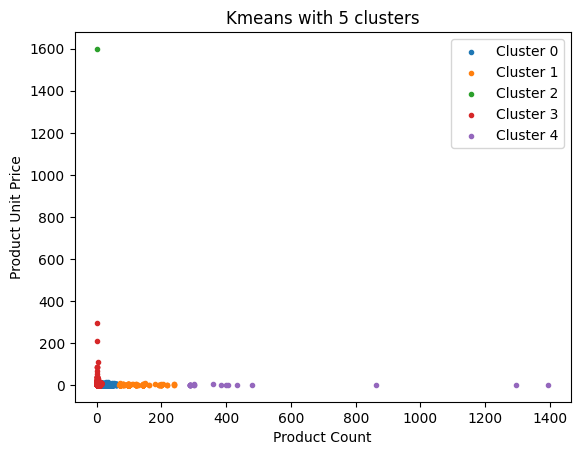

Cluster: 4, Iteration: 999

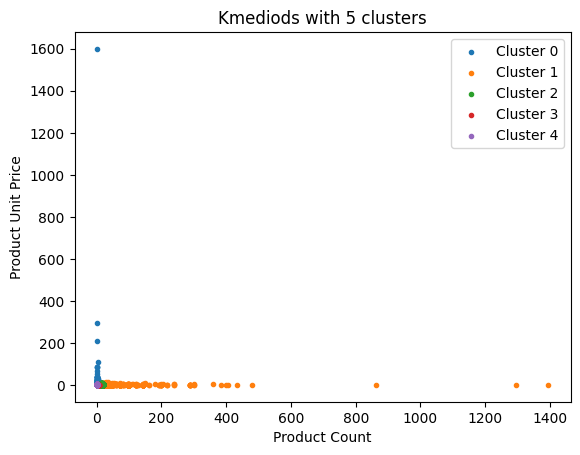

Cluster Count: 22
Noise points are the black stars


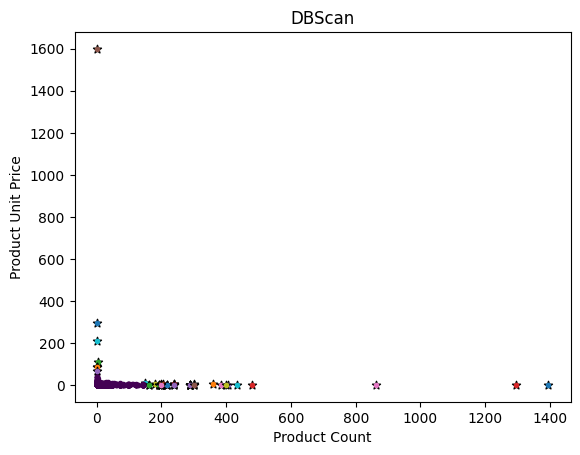

In [ ]:
def experiment1_task3():
    data = get_data_task3()
    data = data.dropna() # removing the rows with missing values
    data = data[['Product_Count', 'Product_UnitPrice']].values
    x = data[:, 0]
    y = data[:, 1]
    valid_data_points = []
    for i in range(len(data)):
        if x[i] > 0 and y[i] > 0:
            valid_data_points.append(i)
    data = data[valid_data_points]
    data = data[0:len(data):50]

    wss = []
    for i in range(2, 11):
        kmeans = Kmeans(i)
        kmeans.train(data, 100)
        kmeans_pred = kmeans.predict(data)
        wss.append(wcsse(data, kmeans.centers_, kmeans_pred))

    plt.plot(range(2, 11), wss)
    plt.xlabel('No of Clusters')
    plt.ylabel('WCSSE')
    plt.title('WCSSE Vs No of Clusters')
    plt.grid()
    plt.show()


    kmeans = Kmeans(5)
    kmeans.train(data, 100)
    kmeans_pred = kmeans.predict(data)
    # data = data[0:len(data)]
    for i in range(5):
        plt.scatter(data[kmeans_pred == i][:, 0], data[kmeans_pred == i][:, 1], label = f'Cluster {i}', marker = '.')

    plt.title('Kmeans with 5 clusters')
    plt.xlabel('Product Count')
    plt.ylabel('Product Unit Price')
    plt.legend()
    plt.show()



    kmediods = Kmediods(5)
    kmediods.train(data, 1000)
    kmediods_pred, _ = kmediods.predict(data)
    for i in range(5):
        plt.scatter(data[kmediods_pred == i][:, 0], data[kmediods_pred == i][:, 1], label = f'Cluster {i}', marker = '.')
    plt.title('Kmediods with 5 clusters')
    plt.xlabel('Product Count')
    plt.ylabel('Product Unit Price')
    plt.legend()
    plt.show()

    dbscan = DBScan(10, 20)
    dbscan_pred = dbscan.fit(data)
    print(dbscan.cluster_count)
    # print(dbscan_pred)
    for key in dbscan_pred:
        if dbscan_pred[key] is None:
            plt.scatter(key[0], key[1], c = 'black', marker = '*')
            # print('hi')
        plt.scatter(key[0], key[1], c = dbscan_pred[key], marker='.')
    print("Noise points are the black stars")
    plt.title(f'DBScan')
    plt.xlabel('Product Count')
    plt.ylabel('Product Unit Price')
    plt.show()





experiment1_task3()


1. Further we find that 5 clusters is the optimal no of cluster in k means using the elbow method
2. K mediod algorithm takes to too long for the given data set and doesnot produce very good clusters either.
3. We found that increasing the value of epi in dbscan results in more number of  clusters, further incresing the value of min samples increase the number of clusters.

4. In Db scan we do not have to give the number of clusters in advance further k means is not able to identify outliers whereas dbscan is able to. furhter the cluster count at the end of dbscan is too large.